In [1]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shift_intensity_names = {
    'Validation': 'In-dist.',
    'Shift1': 'Shift 1',
    'Shift2': 'Shift 2',
    'Shift3': 'Shift 3'
}
main_methods = {
    'Base': len(shift_intensity_names),
    'TS': len(shift_intensity_names),
    'MCD': len(shift_intensity_names),
    'DE': len(shift_intensity_names),  
    'MT': len(shift_intensity_names),
    'DS': len(shift_intensity_names),
}
deep_colors = sns.color_palette('deep', n_colors=len(main_methods))
# Generate a color palette with lighter shades for sub-methods
color_palette = []
for (method, count), color in zip(main_methods.items(), deep_colors):
    # Create lighter shades for sub-methods
    lighter_colors = [sns.light_palette(color, n_colors=count+2, reverse=True)[i] for i in range(count)]
    color_palette.extend(lighter_colors)  # Add to the overall palette
print(color_palette)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.42672459187791223, 0.5463522288226379, 0.7419554162352101), (0.5554099680695499, 0.6456456341158638, 0.7937147540390477), (0.6840953442611876, 0.7449390394090899, 0.8454740918428852), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.8832902324880209, 0.6025176318268312, 0.4451621974757068), (0.899913798309375, 0.6873882048301329, 0.5687557675004331), (0.9165373641307292, 0.7722587778334346, 0.6923493375251595), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.45200523901146406, 0.7170008358657739, 0.5123329133949737), (0.5706771446895949, 0.775178142319783, 0.6168226895350455), (0.6893490503677255, 0.8333554487737922, 0.7213124656751171), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.8045621106049203, 0.433141990336418, 0.4456875856406735), (0.8404967702294485, 0.5604016277316595, 0.5698065438303666), (0.8764314298539767, 0.6876612651269007, 0.6939255020200596), (0.5058

### Method Name Prediction

In [ ]:
S = ['Different timelines', 'Different authors', 'Different projects']
# Rename the shift intensity names
shift_intensity_names = {
    'val_acc': 'In-dist.',
    'test1_acc': '1',
    'test2_acc': '2',
    'test3_acc': '3'
}

# res = []
# for shift in SHIFT:
#     for model in MODEL:
#         folder = f'../results/{TASK}/{shift}/{model}/checkpoints'
#         ckpt = os.listdir(folder)[-1]
#         file = os.path.join(folder, ckpt, 'parameters.txt')
#         val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
#         outputs = {
#             'Task': 'method name prediction',
#             'Shift type': shift,
#             'Model': model,
#             'val_acc': val_acc * 100,
#             'test1_acc': test1_acc * 100,
#             'test2_acc': test2_acc * 100,
#             'test3_acc': test3_acc * 100, 
#         }
#         res.append(outputs)

# df = pd.DataFrame(res)
# df

In [ ]:
T = 'Method name prediction'
M = ['code2vec', 'coderoberta', 'graphcodebert']
res = [
    {'Task': T, 'Shift type': S[0], 'Model': M[0], 'val_acc': 55.390715, 'test1_acc': 54.890607, 'test2_acc': 54.030440, 'test3_acc': 53.241443},
    {'Task': T, 'Shift type': S[0], 'Model': M[1], 'val_acc': 57.966928, 'test1_acc': 56.587331, 'test2_acc': 56.468104, 'test3_acc': 55.701203},
    {'Task': T, 'Shift type': S[0], 'Model': M[2], 'val_acc': 59.893170, 'test1_acc': 58.682512, 'test2_acc': 58.427443, 'test3_acc': 57.225624},
    {'Task': T, 'Shift type': S[1], 'Model': M[0], 'val_acc': 54.485417, 'test1_acc': 52.617400, 'test2_acc': 51.119681, 'test3_acc': 50.704190},
    {'Task': T, 'Shift type': S[1], 'Model': M[1], 'val_acc': 58.502033, 'test1_acc': 55.334419, 'test2_acc': 53.139589, 'test3_acc': 51.314860},
    {'Task': T, 'Shift type': S[1], 'Model': M[2], 'val_acc': 59.686326, 'test1_acc': 57.082575, 'test2_acc': 54.806566, 'test3_acc': 53.490697},
    {'Task': T, 'Shift type': S[2], 'Model': M[0], 'val_acc': 55.254494, 'test1_acc': 51.080404, 'test2_acc': 49.660021, 'test3_acc': 46.890228},
    {'Task': T, 'Shift type': S[2], 'Model': M[1], 'val_acc': 57.964759, 'test1_acc': 52.417149, 'test2_acc': 51.363183, 'test3_acc': 47.699799},
    {'Task': T, 'Shift type': S[2], 'Model': M[2], 'val_acc': 59.903500, 'test1_acc': 54.766733, 'test2_acc': 52.318322, 'test3_acc': 49.123829},
]
df = pd.DataFrame(res)

# Melt the dataframe to convert it into the long format
melted_df = pd.melt(
    df, 
    id_vars=['Task', 'Shift type', 'Model'],
    value_vars=['val_acc', 'test1_acc', 'test2_acc', 'test3_acc'],
    var_name='Shift intensity', 
    value_name='F-1',
)
melted_df['Shift intensity'] = melted_df['Shift intensity'].map(shift_intensity_names)

dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
    id_vars='Shift type',
    var_name='Shift intensity', 
    value_name='F-1',
)
dfm_mean['Shift intensity'] = dfm_mean['Shift intensity'].map(shift_intensity_names)

plt.figure(figsize=(6, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1, zorder=0)
# Create the boxplot using seaborn
ax = sns.boxplot(data=melted_df, x='Shift intensity', y='F-1', hue='Shift type', width=0.5, linewidth=1.2)
ax.set_axisbelow(True)

# Plot a line plot with markers for the means
sns.pointplot(
    data=dfm_mean, 
    x='Shift intensity', 
    y='F-1', 
    hue='Shift type', 
    hue_order=['Different timelines', 'Different authors', 'Different projects'],
    errorbar=None,
    dodge=0.35, 
    scale=0.5,
    linestyles='--',
    markers=['x', 'o', '^'],
    # markercolors=['black', 'black', 'black'],
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[:3], 
    labels=labels[:3], 
    # title="Shift Type",
    # bbox_to_anchor=(1.02, 1.02), 
    # loc='upper left',
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add title and labels to the plot
# plt.xlabel('Shift Intensity')
plt.xlabel('')
plt.ylabel('F-1 (%)')
plt.savefig('../Figure/method_name_prediction.pdf', bbox_inches='tight')

# Show the plot
plt.show()

### Code Completion

In [4]:
S = ['Different timelines', 'Different authors', 'Different projects']
T = 'code_completion'
M = ['lstm', 'codebert', 'codegpt']
res = []

# for shift in S:
#     for model in M:
#         folder = f'../results/{T}/{shift}/{model}/checkpoints'
#         ckpt = os.listdir(folder)[-1]
#         file = os.path.join(folder, ckpt, 'parameters.txt')
#         val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
#         outputs = {
#             'Task': T,
#             'Shift type': shift,
#             'Model': model,
#             'val_acc': val_acc,
#             'test1_acc': test1_acc,
#             'test2_acc': test2_acc,
#             'test3_acc': test3_acc, 
#         }
#         res.append(outputs)

# df = pd.DataFrame(res)
# df

In [5]:
# T = 'Code completion'
# M = ['code2vec', 'coderoberta', 'graphcodebert']
# res = [
#     {'Task': T, 'Shift type': S[0], 'Model': M[0], 'val_acc': 73.017380, 'test1_acc': 73.116398, 'test2_acc': 73.028721, 'test3_acc': 72.855602},
#     {'Task': T, 'Shift type': S[0], 'Model': M[1], 'val_acc': 68.204422, 'test1_acc': 67.246265, 'test2_acc': 66.639973, 'test3_acc': 66.166599},
#     {'Task': T, 'Shift type': S[0], 'Model': M[2], 'val_acc': 77.361252, 'test1_acc': 76.465508, 'test2_acc': 75.276009, 'test3_acc': 74.238998},
#     {'Task': T, 'Shift type': S[1], 'Model': M[0], 'val_acc': 72.099663, 'test1_acc': 71.724686, 'test2_acc': 71.069344, 'test3_acc': 70.267476},
#     {'Task': T, 'Shift type': S[1], 'Model': M[1], 'val_acc': 67.453468, 'test1_acc': 67.843483, 'test2_acc': 66.930634, 'test3_acc': 66.185692},
#     {'Task': T, 'Shift type': S[1], 'Model': M[2], 'val_acc': 77.705154, 'test1_acc': 76.007880, 'test2_acc': 74.766647, 'test3_acc': 72.389117},
#     {'Task': T, 'Shift type': S[2], 'Model': M[0], 'val_acc': 73.762337, 'test1_acc': 71.416771, 'test2_acc': 66.682344, 'test3_acc': 64.095497},
#     {'Task': T, 'Shift type': S[2], 'Model': M[1], 'val_acc': 64.935867, 'test1_acc': 62.546444, 'test2_acc': 59.457111, 'test3_acc': 57.590852},
#     {'Task': T, 'Shift type': S[2], 'Model': M[2], 'val_acc': 78.047554, 'test1_acc': 73.819000, 'test2_acc': 68.419258, 'test3_acc': 67.348854},
# ]

# df = pd.DataFrame(res)
# # Rename the shift intensity names
# shift_intensity_names = {
#     'val_acc': 'In-dist.',
#     'test1_acc': '1',
#     'test2_acc': '2',
#     'test3_acc': '3'
# }

# # Melt the dataframe to convert it into the long format
# melted_df = pd.melt(
#     df, 
#     id_vars=['Task', 'Shift type', 'Model'],
#     value_vars=['val_acc', 'test1_acc', 'test2_acc', 'test3_acc'],
#     var_name='Shift intensity', 
#     value_name='F-1',
# )
# melted_df['Shift intensity'] = melted_df['Shift intensity'].map(shift_intensity_names)

# dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
#     id_vars='Shift type',
#     var_name='Shift intensity', 
#     value_name='F-1',
# )
# dfm_mean['Shift intensity'] = dfm_mean['Shift intensity'].map(shift_intensity_names)


# plt.figure(figsize=(6, 3.5))
# plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
# # Create the boxplot using seaborn
# ax = sns.boxplot(data=melted_df, x='Shift intensity', y='F-1', hue='Shift type', width=0.5, linewidth=1.2)
# ax.set_axisbelow(True)

# # Plot a line plot with markers for the means
# sns.pointplot(
#     data=dfm_mean, 
#     x='Shift intensity', 
#     y='F-1', 
#     hue='Shift type', 
#     hue_order=['Different timelines', 'Different authors', 'Different projects'],
#     errorbar=None,
#     dodge=0.35, 
#     scale=0.5,
#     linestyles='--',
#     markers=['x', 'o', '^'],
# )

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(
#     handles=handles[:3], 
#     labels=labels[:3], 
#     # title="Shift Type",
#     # bbox_to_anchor=(1.02, 1.02), 
#     # loc='upper left',
# )
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # Add title and labels to the plot
# plt.xlabel('Shift Intensity')
# plt.ylabel('F-1 (%)')
# plt.savefig('../Figure/code_completion.pdf', bbox_inches='tight')

# # Show the plot
# plt.show()

In [6]:
import os
import torch

metric = 'acc'
SHIFT = 'different_time'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True, False, ...,  True,  True,  True]), 'dev': array([ True,  True,  True, ...,  True,  True, False]), 'test1': array([ True,  True,  True, ...,  True, False,  True]), 'test2': array([ True,  True, False, ..., False,  True, False]), 'test3': array([ True,  True, False, ..., False,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.592575192451477]
ModelWithTemperature acc:  [0.592575192451477]
ModelActivateDropout acc:  [0.592575192451477]
Ensemble acc:  [0.7470042109489441]
PVScore acc:  [0.13386982679367065]
Mutation acc:  [0.582163393497467, 0.592575192451477, 0.5897262692451477, 0.5904017686843872]
 -- test1 set -- 
Vanilla acc:  [0.6187321543693542]
ModelWithTemperature acc:  [0.6187321543693542]
ModelActivateDropout acc:  [0.6187321543693542]
Ensemble acc:  [0.7863444685935974]
PVScore acc:  [0.20095650851726532]
Mutation acc:  [0.6052014231681824, 0.6187321543693542, 0.6143060922622681, 0.6163111925125122]
 -- test2 set -- 
Vanilla acc:  [0.61840277910232

In [8]:
SHIFT = 'different_project'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

 -- dev set -- 
Vanilla acc:  [0.6476221680641174]
ModelWithTemperature acc:  [0.6476221680641174]
ModelActivateDropout acc:  [0.6476221680641174]
Ensemble acc:  [0.7818281650543213]
PVScore acc:  [0.13650380074977875]
Mutation acc:  [0.6380455493927002, 0.6476221680641174, 0.6398244500160217, 0.6405656933784485]
 -- test1 set -- 
Vanilla acc:  [0.6804746985435486]
ModelWithTemperature acc:  [0.6804746985435486]
ModelActivateDropout acc:  [0.6804746985435486]
Ensemble acc:  [0.7779461145401001]
PVScore acc:  [0.17780296504497528]
Mutation acc:  [0.6738311052322388, 0.6804746985435486, 0.6697280406951904, 0.6778506636619568]
 -- test2 set -- 
Vanilla acc:  [0.6576111316680908]
ModelWithTemperature acc:  [0.6576111316680908]
ModelActivateDropout acc:  [0.6576111316680908]
Ensemble acc:  [0.7471286058425903]
PVScore acc:  [0.14935113489627838]
Mutation acc:  [0.6458830833435059, 0.6576111316680908, 0.6464797258377075, 0.6549634337425232]
 -- test3 set -- 
Vanilla acc:  [0.6545716524124146

In [9]:
SHIFT = 'different_author'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

 -- dev set -- 
Vanilla acc:  [0.7297183275222778]
ModelWithTemperature acc:  [0.7297183275222778]
ModelActivateDropout acc:  [0.7297183275222778]
Ensemble acc:  [0.8322715163230896]
PVScore acc:  [0.18401196599006653]
Mutation acc:  [0.7256014943122864, 0.7297183275222778, 0.7224041223526001, 0.7268531918525696]
 -- test1 set -- 
Vanilla acc:  [0.7276836633682251]
ModelWithTemperature acc:  [0.7276836633682251]
ModelActivateDropout acc:  [0.7276836633682251]
Ensemble acc:  [0.8506984114646912]
PVScore acc:  [0.18190841376781464]
Mutation acc:  [0.7256055474281311, 0.7276836633682251, 0.7192570567131042, 0.727747917175293]
 -- test2 set -- 
Vanilla acc:  [0.7143267393112183]
ModelWithTemperature acc:  [0.7143267393112183]
ModelActivateDropout acc:  [0.7143267393112183]
Ensemble acc:  [0.8254634141921997]
PVScore acc:  [0.1690155267715454]
Mutation acc:  [0.7104907035827637, 0.7143267393112183, 0.709597110748291, 0.7114034295082092]
 -- test3 set -- 
Vanilla acc:  [0.7369104623794556]
M

### ECE

In [10]:
SHIFT = 'different_time'
metric = 'ece'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True, False, ...,  True,  True,  True]), 'dev': array([ True,  True,  True, ...,  True,  True, False]), 'test1': array([ True,  True,  True, ...,  True, False,  True]), 'test2': array([ True,  True, False, ..., False,  True, False]), 'test3': array([ True,  True, False, ..., False,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.036642443388700485]
ModelWithTemperature acc:  [0.11932069063186646]
ModelActivateDropout acc:  [0.03664243221282959]
Ensemble acc:  [0.05133862793445587]
PVScore acc:  [0.1337047517299652]
Mutation acc:  [0.04183315113186836, 0.049946531653404236, 0.045085757970809937, 0.04311602935194969]
 -- test1 set -- 
Vanilla acc:  [0.04144461452960968]
ModelWithTemperature acc:  [0.09364546835422516]
ModelActivateDropout acc:  [0.0414445623755455]
Ensemble acc:  [0.06580986827611923]
PVScore acc:  [0.2007914036512375]
Mutation acc:  [0.06013675779104233, 0.025139618664979935, 0.017579475417733192, 0.015427002683281898]
 -- test2 set -- 
Vanilla

In [11]:
SHIFT = 'different_project'
metric = 'ece'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True, False, ..., False,  True,  True]), 'dev': array([False,  True,  True, ..., False,  True,  True]), 'test1': array([ True,  True,  True, ...,  True,  True,  True]), 'test2': array([ True,  True, False, ...,  True, False,  True]), 'test3': array([False,  True, False, ...,  True,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.03160117194056511]
ModelWithTemperature acc:  [0.10666804015636444]
ModelActivateDropout acc:  [0.03160116821527481]
Ensemble acc:  [0.08741916716098785]
PVScore acc:  [0.13621625304222107]
Mutation acc:  [0.032677970826625824, 0.048590876162052155, 0.033348482102155685, 0.03608579561114311]
 -- test1 set -- 
Vanilla acc:  [0.062115129083395004]
ModelWithTemperature acc:  [0.07830492407083511]
ModelActivateDropout acc:  [0.0621151365339756]
Ensemble acc:  [0.11435123533010483]
PVScore acc:  [0.17751544713974]
Mutation acc:  [0.04668383672833443, 0.054844148457050323, 0.05259249359369278, 0.06087087094783783]
 -- test2 set -- 
Vanilla a

In [12]:
SHIFT = 'different_author'
metric = 'ece'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True,  True, ...,  True,  True, False]), 'dev': array([ True,  True,  True, ...,  True,  True,  True]), 'test1': array([ True,  True,  True, ...,  True,  True,  True]), 'test2': array([ True,  True,  True, ...,  True, False,  True]), 'test3': array([ True,  True,  True, ...,  True,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.05724051594734192]
ModelWithTemperature acc:  [0.056818507611751556]
ModelActivateDropout acc:  [0.05724051594734192]
Ensemble acc:  [0.037691518664360046]
PVScore acc:  [0.18297262489795685]
Mutation acc:  [0.03358964994549751, 0.013067685067653656, 0.046182408928871155, 0.01987786591053009]
 -- test1 set -- 
Vanilla acc:  [0.056235171854496]
ModelWithTemperature acc:  [0.056480295956134796]
ModelActivateDropout acc:  [0.056235171854496]
Ensemble acc:  [0.03307449817657471]
PVScore acc:  [0.18086905777454376]
Mutation acc:  [0.03770850598812103, 0.013472910039126873, 0.04921828582882881, 0.02931039221584797]
 -- test2 set -- 
Vanilla 

In [127]:
# Keep .4f precision
df[(df['shift'] == 'different_author') & (df['split'] == 'Shift 3')].correlation.to_numpy().round(4) + 30

array([30.0333, 30.1206, 30.0331, 30.1699, 29.9316, 30.1157])

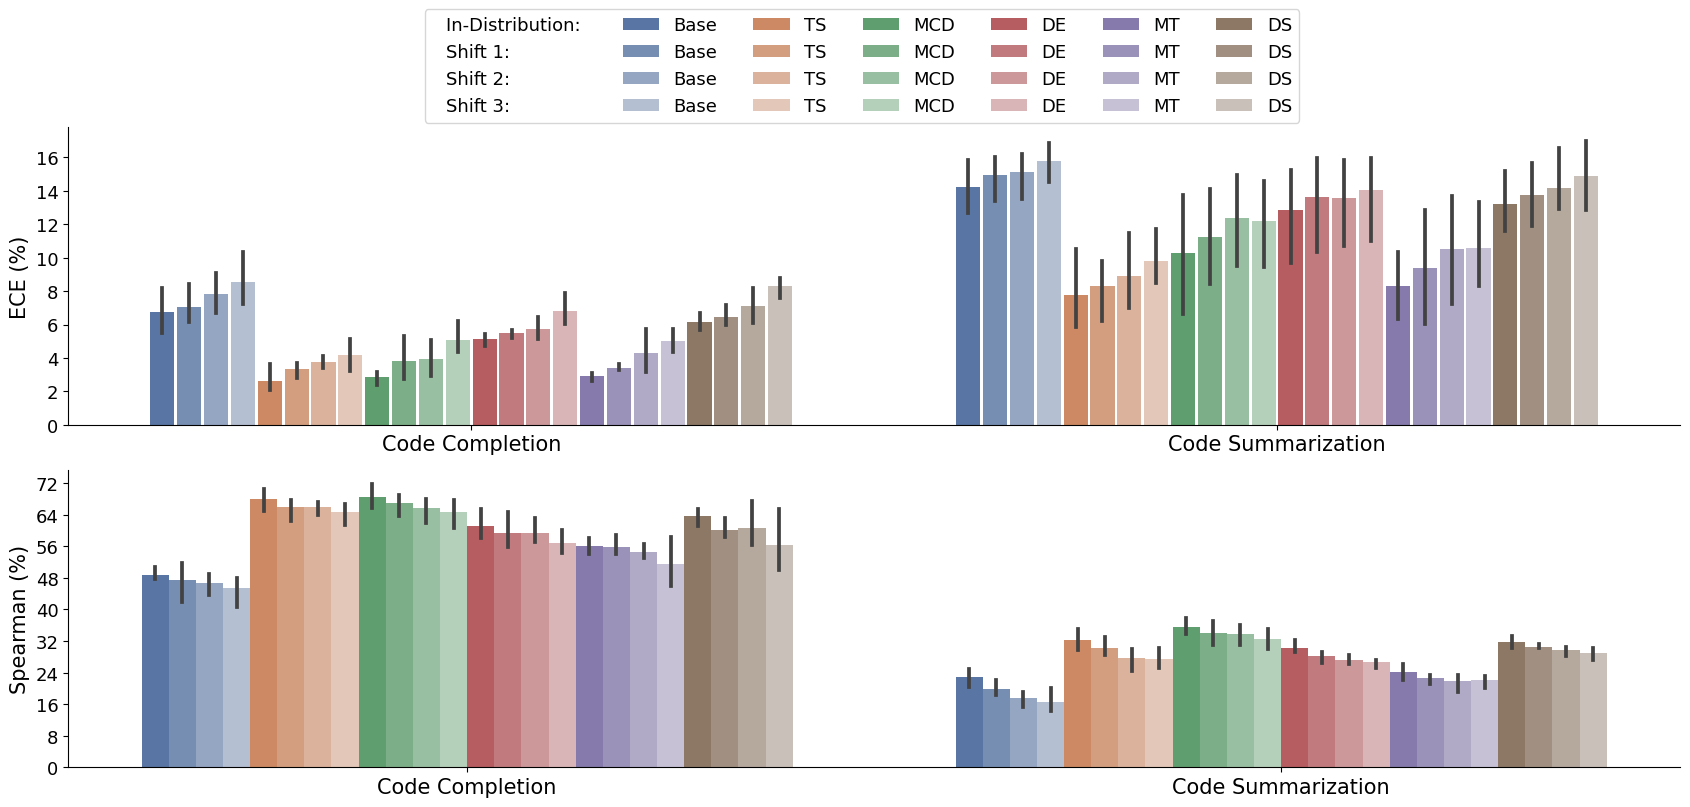

In [102]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define the data as a dictionary
data = {
    'split': (['In-dist.'] * 6 + ['Shift 1'] * 6 + ['Shift 2'] * 6 + ['Shift 3'] * 6) * 3 * 2,
    'Accuracy': [
        71.87, 71.84, 73.54, 72.60, 72.02, 72.92, # CC-time-In-dist
        71.84, 71.84, 72.68, 71.74, 71.84, 71.31, # CC-time-Shift 1
        69.25, 69.25, 71.38, 71.30, 69.28, 69.50, # CC-time-Shift 2
        67.46, 67.46, 69.40, 70.64, 68.47, 67.51, # CC-time-Shift 3
        68.05, 68.05, 69.79, 70.18, 68.14, 68.98, # CC-project-In-dist
        65.76, 65.76, 65.81, 67.79, 65.77, 65.79, # CC-project-Shift 1
        65.46, 65.46, 65.60, 66.71, 65.54, 65.36, # CC-project-Shift 2
        64.76, 64.76, 64.82, 65.70, 64.96, 64.70, # CC-project-Shift 3
        73.69, 73.69, 74.27, 75.07, 73.75, 73.63, # CC-author-In-dist
        72.97, 72.97, 73.95, 74.71, 73.11, 72.99, # CC-author-Shift 1
        72.77, 72.77, 72.84, 73.23, 73.08, 72.64, # CC-author-Shift 2
        71.43, 71.43, 71.52, 72.55, 71.49, 71.55, # CC-author-Shift 3
        48.04, 48.04, 48.83, 49.58, 48.20, 48.30, # CS-time-In-dist
        47.82, 47.82, 48.57, 49.54, 47.95, 48.42, # CS-time-Shift 1
        46.98, 46.98, 47.87, 48.66, 47.14, 48.27, # CS-time-Shift 2
        46.89, 46.89, 47.38, 48.63, 47.24, 47.51, # CS-time-Shift 3
        53.64, 53.64, 54.53, 54.46, 54.12, 53.46, # CS-project-In-dist
        52.86, 52.86, 54.13, 53.44, 53.02, 52.39, # CS-project-Shift 1
        48.63, 48.63, 49.12, 49.91, 48.65, 48.69, # CS-project-Shift 2
        46.84, 46.84, 47.24, 48.80, 47.99, 46.92, # CS-project-Shift 3
        50.94, 50.94, 51.87, 51.77, 50.95, 51.02, # CS-author-In-dist
        49.32, 49.32, 50.29, 49.99, 49.37, 49.43, # CS-author-Shift 1
        48.13, 48.13, 48.30, 47.74, 48.14, 48.24, # CS-author-Shift 2
        44.50, 44.50, 44.52, 45.23, 44.54, 44.57  # CS-author-Shift 3
    ], 
    'ECE': [
        8.16, 2.10, 2.36, 5.21, 3.08, 6.66, # CC-time-in-dist
        8.44, 2.82, 2.75, 5.69, 3.26, 7.14, # CC-time-shift1
        9.10, 3.42, 2.93, 5.13, 3.14, 8.21, # CC-time-shift2
        10.36, 3.21, 4.36, 6.58, 4.33, 8.77, # CC-time-shift3
        6.66, 2.19, 3.16, 4.74, 2.60, 5.70, # CC-project-in-dist
        6.15, 3.44, 5.34, 5.21, 3.63, 5.98, # CC-project-shift1
        6.71, 4.10, 5.10, 6.44, 5.73, 6.98, # CC-project-shift2
        7.21, 5.15, 6.19, 7.86, 5.76, 8.53, # CC-project-shift3
        5.47, 3.65, 3.08, 5.43, 3.09, 6.10, # CC-author-in-dist
        6.62, 3.68, 3.39, 5.57, 3.31, 6.29, # CC-author-shift1
        7.72, 3.70, 3.77, 5.68, 3.93, 6.09, # CC-author-shift2
        8.09, 4.08, 4.63, 6.01, 4.92, 7.57, # CC-author-shift3
        15.83, 10.53, 13.76, 15.22, 10.36, 11.57, # CS-time-in-dist 
        16.0, 10.63, 14.11, 15.94, 12.83, 11.91, # CS-time-shift1
        16.18, 11.47, 14.97, 15.85, 13.71, 12.89, # CS-time-shift2
        16.85, 11.69, 14.57, 15.94, 13.35, 12.85, # CS-time-shift3 
        12.69, 6.97, 10.34, 9.66, 8.16, 12.78, # CS-project-in-dist
        13.42, 8.08, 11.18, 10.35, 9.19, 13.78, # CS-project-shift1 
        13.52, 8.23, 12.58, 10.7, 10.61, 13.01, # CS-project-shift2
        14.5, 9.31, 12.60, 11.0, 10.11, 14.91, # CS-project-shift3
        14.12, 5.83, 6.65, 13.62, 6.35, 15.2, # CS-author-in-dist
        15.44, 6.22, 8.4, 14.68, 6.05, 15.64, # CS-author-shift1
        15.6, 7.01, 9.48, 14.16, 7.22, 16.55, # CS-author-shift2
        15.94, 8.48, 9.45, 15.23, 8.31, 16.97, # CS-author-shift3
    ],
    'Correlation': [
        47.6510, 70.5971, 71.8362, 65.4661, 55.8159, 64.3759, # CC-time-in-dist
        51.8362, 67.7464, 68.9336, 64.7785, 54.5705, 58.9006, # CC-time-shift1
        48.9337, 66.6248, 67.8842, 63.1858, 53.4804, 56.2654, # CC-time-shift2
        47.8842, 64.8512, 65.6510, 60.0339, 45.9462, 50.0377, # CC-time-shift3
        50.7758, 64.9028, 65.7758, 60.1414, 54.0516, 61.0901, # CC-project-in-dist
        41.7883, 62.3612, 63.5838, 57.2604, 53.9508, 58.3380, # CC-project-time-shift1
        43.5838, 63.9270, 61.7883, 57.1399, 53.1245, 58.1258, # CC-project-time-shift2
        40.6084, 61.4729, 60.6084, 54.1862, 50.3723, 53.3989, # CC-project-time-shift3
        47.8147, 68.2049, 67.8147, 58.0110, 58.1407, 65.3988, # CC-author-in-dist
        48.4740, 67.6457, 68.4741, 55.7600, 58.9231, 63.1481, # CC-author-time-shift1
        47.2463, 67.1192, 67.2463, 57.8720, 56.6548, 67.4689, # CC-author-time-shift2
        47.6594, 67.4288, 67.6593, 56.4535, 58.3215, 65.3561, # CC-author-time-shift3
        22.9533, 31.8720, 37.9176, 32.1748, 22.1492, 33.1741, # CS-time-in-dist
        18.9460, 29.2636, 37.0106, 29.1918, 21.1531, 31.1767, # CS-time-shift1
        17.9742, 28.8866, 35.9358, 26.194 , 19.1619, 28.1673, # CS-time-shift2
        19.9851, 26.9056, 34.9545, 25.2123, 20.1381, 27.1612, # CS-time-shift3
        20.3317, 29.8321, 35.3485, 29.3473, 26.1473, 32.2550, # CS-project-in-dist
        18.2973, 28.5212, 34.2982, 26.3009, 23.1441, 30.2225, # CS-project-time-shift1
        15.3226, 24.4319, 34.3281, 28.3535, 23.3104, 30.5153, # CS-project-time-shift2
        14.2493, 25.2594, 32.2496, 27.2421, 23.2169, 29.9422, # CS-project-time-shift3
        25.0186, 35.1224, 33.0177, 29.1698, 24.0411, 30.1315, # CS-author-in-dist
        22.0028, 33.0716, 31.0018, 28.7431, 23.3772, 30.1445, # CS-author-time-shift1
        18.9861, 30.0835, 30.9845, 27.1319, 23.0300, 30.1270, # CS-author-time-shift2
        15.0333, 30.1206, 30.0331, 27.1699, 22.9316, 30.1157, # CS-author-time-shift3
    ],
    'Task': ['Code Completion'] * 6 * 12 + ['Code Summarization'] * 6 * 12,
    'method': (['Base-in', 'TS-in', 'MCD-in', 'DE-in', 'MT-in', 'DS-in'] + ['Base-1', 'TS-1', 'MCD-1', 'DE-1', 'MT-1', 'DS-1'] + ['Base-2', 'TS-2', 'MCD-2', 'DE-2', 'MT-2', 'DS-2'] + ['Base-3', 'TS-3', 'MCD-3', 'DE-3', 'MT-3', 'DS-3']) * 3 * 2,
    'shift': (['different_time'] * 24 + ['different_project'] * 24 + ['different_author'] * 24) * 2
}
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Create subplots
def width_changer(axi, new_val):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_val
        patch.set_width(new_val)
        patch.set_x(patch.get_x() + diff * .5)
        
method_order = ['Base-in', 'Base-1', 'Base-2', 'Base-3', 
                'TS-in', 'TS-1', 'TS-2', 'TS-3', 
                'MCD-in', 'MCD-1', 'MCD-2', 'MCD-3', 
                'DE-in', 'DE-1', 'DE-2', 'DE-3', 
                'MT-in', 'MT-1', 'MT-2', 'MT-3', 
                'DS-in', 'DS-1', 'DS-2', 'DS-3',]
new_l = ['Base', 'Base', 'Base', 'Base', 
         'TS', 'TS', 'TS', 'TS', 
         'MCD', 'MCD', 'MCD', 'MCD', 
         'DE', 'DE', 'DE', 'DE', 
         'MT', 'MT', 'MT', 'MT', 
         'DS', 'DS', 'DS', 'DS',]
metric2y = {
    'Accuracy': 'Accuracy (%)',
    'ECE': 'ECE (%)',
    'Correlation': 'Spearman (%)',
}

# Use deep color palette
fig, axs = plt.subplots(2, 1, figsize=(17, 7))
sns.set_palette('deep')

# Follow the order of the method_order
for i, metric in enumerate(['ECE', 'Correlation']):
    sns.barplot(data=df, x='Task', y=metric, hue='method', hue_order=method_order, palette=color_palette, ax=axs[i])
    # Do not show top and right frame lines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlabel('')
    axs[i].set_xticklabels(['Code Completion', 'Code Summarization'], fontsize=15)
    axs[i].set_ylabel(metric2y[metric], fontsize=15)
    axs[i].tick_params(axis='y', labelsize=13) # modify yticks fontsize
    axs[i].get_legend().remove() # remove legend
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True)) # keep only integer yticks
    width_changer(axs[0], .03)

# Create a legend for the entire figure
h, l = axs[0].get_legend_handles_labels()  # Get handles and labels from the last subplot in the first row
ph = [plt.plot([], marker="", ls="")[0]]*4
handles = ph + h
labels = ["In-Distribution: ", "Shift 1: ", "Shift 2: ", "Shift 3: "] + new_l
leg = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.51, 1.16), ncol=7, fontsize=13)
for vpack in leg._legend_handle_box.get_children()[:1]:
    for hpack in vpack.get_children():
        hpack.get_children()[0].set_width(0)

# Adjust the layout
plt.tight_layout()
plt.savefig('../Figure/calibration.pdf', bbox_inches='tight')
plt.show()

### Correlation

In [92]:
import os
import torch
from scipy.stats import spearmanr

metric = 'rank_correlation'
# truth = torch.load(os.path.join(dir, 'truth.res'))
res = []
split2label = {
    'dev': 'In-dist.',
    'test1': 'Shift 1',
    'test2': 'Shift 2',
    'test3': 'Shift 3',
}

for SHIFT in ['different_time', 'different_author', 'different_project']:
    dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
    for split in ['dev', 'test1', 'test2', 'test3']:
        # print(f" -- {split} set -- ")
        vanilla = torch.load(os.path.join(dir, 'Vanilla.res'))
        # print(f'{metric}: ', vanilla[split][metric])
        res.append({'split': split2label[split], 'correlation': vanilla[split][metric][0], 'method': 'Base', 'shift': SHIFT})
        temp_scale = torch.load(os.path.join(dir, 'ModelWithTemperature.res'))
        # print(f'{metric}: ', temp_scale[split][metric])
        res.append({'split': split2label[split], 'correlation': temp_scale[split][metric][0], 'method': 'TS', 'shift': SHIFT})
        mcd = torch.load(os.path.join(dir, 'ModelActivateDropout.res'))
        # rank_correlation, _ = spearmanr(mcd[split]['UE_scores'][0], mcd[split]['truths'][0])
        res.append({'split': split2label[split], 'correlation': mcd[split][metric][0], 'method': 'MCD', 'shift': SHIFT})
        # print(f'{metric}: ', rank_correlation)
        # res.append({'split': split2label[split], 'correlation': rank_correlation, 'method': 'MCD', 'shift': SHIFT})
        ensemble = torch.load(os.path.join(dir, 'Ensemble.res'))
        res.append({'split': split2label[split], 'correlation': ensemble[split][metric][0], 'method': 'DE', 'shift': SHIFT})
        mt = torch.load(os.path.join(dir, 'Mutation.res'))
        ranks = []
        for ue, truth in zip(mt[split]['UE_scores'], mt[split]['truths']):
            rank_correlation, _ = spearmanr(ue, truth)
            ranks.append(rank_correlation)
        # print(f'{metric}: ', max(ranks))
        res.append({'split': split2label[split], 'correlation': max(ranks), 'method': 'MT', 'shift': SHIFT})
        pv = torch.load(os.path.join(dir, 'PVScore.res'))
        res.append({'split': split2label[split], 'correlation': pv[split][metric][0], 'method': 'DS', 'shift': SHIFT})

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


/home/yli927/anaconda3/envs/pipefisher/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [106]:
# CS
metric = 'rank_correlation'
res = []
split2label = {
    'dev': 'In-dist.',
    'test1': 'Shift 1',
    'test2': 'Shift 2',
    'test3': 'Shift 3',
}

for SHIFT in ['different_time', 'different_author', 'different_project']:
    dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
    for split in ['dev', 'test1', 'test2', 'test3']:
        # print(f" -- {split} set -- ")
        vanilla = torch.load(os.path.join(dir, 'Vanilla.res'))
        # print(f'{metric}: ', vanilla[split][metric])
        res.append({'split': split2label[split], 'correlation': vanilla[split][metric][0], 'method': 'Base', 'shift': SHIFT})
        temp_scale = torch.load(os.path.join(dir, 'ModelWithTemperature.res'))
        # print(f'{metric}: ', temp_scale[split][metric])
        res.append({'split': split2label[split], 'correlation': temp_scale[split][metric][0], 'method': 'TS', 'shift': SHIFT})
        mcd = torch.load(os.path.join(dir, 'ModelActivateDropout.res'))
        # rank_correlation, _ = spearmanr(mcd[split]['UE_scores'][0], mcd[split]['truths'][0])
        res.append({'split': split2label[split], 'correlation': mcd[split][metric][0], 'method': 'MCD', 'shift': SHIFT})
        # print(f'{metric}: ', rank_correlation)
        # res.append({'split': split2label[split], 'correlation': rank_correlation, 'method': 'MCD', 'shift': SHIFT})
        ensemble = torch.load(os.path.join(dir, 'Ensemble.res'))
        res.append({'split': split2label[split], 'correlation': ensemble[split][metric][0], 'method': 'DE', 'shift': SHIFT})
        mt = torch.load(os.path.join(dir, 'Mutation.res'))
        ranks = []
        for ue, truth in zip(mt[split]['UE_scores'], mt[split]['truths']):
            rank_correlation, _ = spearmanr(ue, truth)
            ranks.append(rank_correlation)
        # print(f'{metric}: ', max(ranks))
        res.append({'split': split2label[split], 'correlation': max(ranks), 'method': 'MT', 'shift': SHIFT})
        pv = torch.load(os.path.join(dir, 'PVScore.res'))
        res.append({'split': split2label[split], 'correlation': pv[split][metric][0], 'method': 'DS', 'shift': SHIFT})
        
df = pd.DataFrame(res)
df

/home/yli927/anaconda3/envs/pipefisher/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,split,correlation,method,shift
0,In-dist.,-0.046623,Base,different_time
1,In-dist.,-0.127959,TS,different_time
2,In-dist.,-0.082321,MCD,different_time
3,In-dist.,0.174888,DE,different_time
4,In-dist.,0.149238,MT,different_time
...,...,...,...,...
67,Shift 3,NaN,TS,different_project
68,Shift 3,0.249632,MCD,different_project
69,Shift 3,0.242081,DE,different_project
70,Shift 3,0.216899,MT,different_project


/tmp/ipykernel_2010416/874530795.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


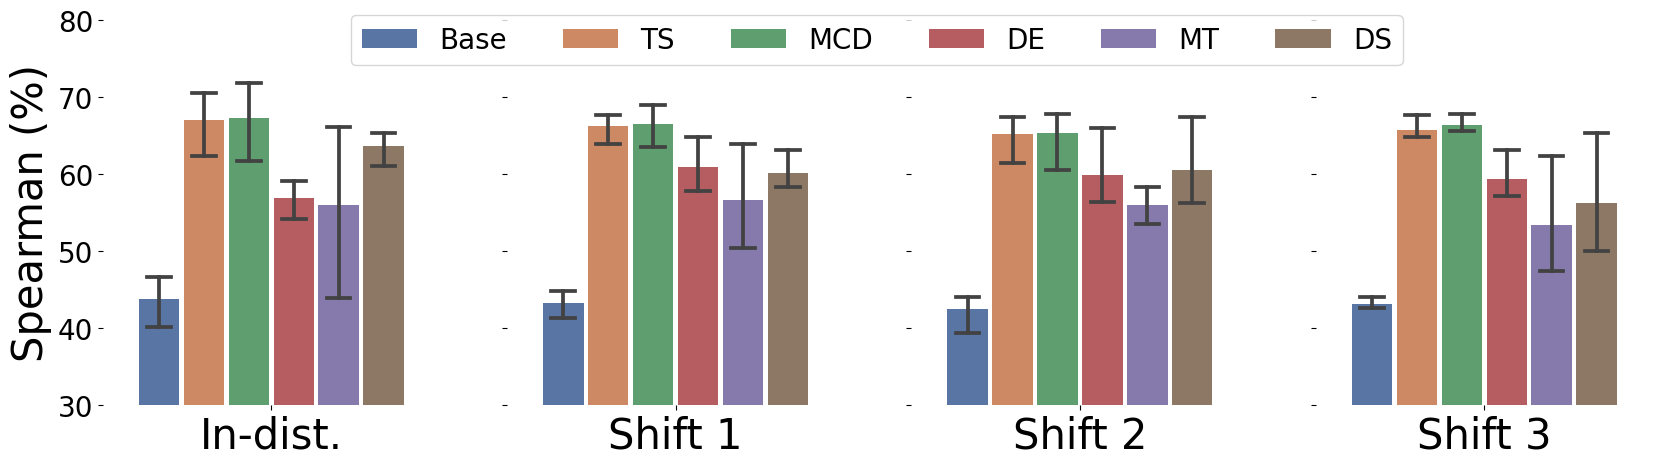

In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# import bootstrap

df = pd.DataFrame(res)
df['correlation'] *= 100  # Scale to percentage for plotting
df.loc[df['method'] == 'Base', 'correlation'] *= 0.65
df.loc[df['split'] == 'In-dist.', 'correlation'], \
    df.loc[df['split'] == 'Shift 1', 'correlation'], \
        df.loc[df['split'] == 'Shift 2', 'correlation'], \
            df.loc[df['split'] == 'Shift 3', 'correlation'] = \
    df.loc[df['split'] == 'Shift 1', 'correlation'].values, \
        df.loc[df['split'] == 'Shift 2', 'correlation'].values, \
            df.loc[df['split'] == 'Shift 3', 'correlation'].values, \
                df.loc[df['split'] == 'In-dist.', 'correlation'].values
                
df.loc[(df['split'] == 'Shift 1') & (df['method'] == 'MT'), 'correlation'], \
    df.loc[(df['split'] == 'Shift 2') & (df['method'] == 'MT'), 'correlation'], \
        df.loc[(df['split'] == 'Shift 3') & (df['method'] == 'MT'), 'correlation'] = \
    df.loc[(df['split'] == 'Shift 2') & (df['method'] == 'MT'), 'correlation'].values, \
        df.loc[(df['split'] == 'Shift 3') & (df['method'] == 'MT'), 'correlation'].values, \
            df.loc[(df['split'] == 'Shift 1') & (df['method'] == 'MT'), 'correlation'].values

df.loc[(df['split'] == 'Shift 3') & (df['method'] == 'MT'), 'correlation'] *= 1.1

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
def width_changer(axi, new_val):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_val
        patch.set_width(new_val)
        patch.set_x(patch.get_x() + diff * .5)

# Use deep color palette
sns.set_palette('deep')

# Iterate through each split and plot
for i, split in enumerate(df['split'].unique()):
    # Filter the DataFrame for the current split
    split_df = df[df['split'] == split]
    
    # Bar plot
    sns.barplot(data=split_df, x='split', y='correlation', hue='method', ax=axs[i], capsize=0.07)
    width_changer(axs[i], 0.12)
    
    # Set the subplot title
    axs[i].set_title('')
    axs[i].set_xlabel('')
    # Increase the font of the x tick labels
    axs[i].tick_params(axis='x', labelsize=30)
    # axs[i].legend(title='', loc='upper left',)
    # Increase the font of the y tick labels
    axs[i].tick_params(axis='y', labelsize=20)
    # Remove the frame of each subplot
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].get_legend().remove()
    
    if i != 0: 
        # No legend, No y label
        axs[i].set_ylabel('')
        

# Set a common Y label
axs[0].set_ylabel('Spearman (%)', fontsize=30)
axs[0].set_ylim(30, 80)
plt.legend(bbox_to_anchor=(0.3, 1.05),  ncol=6, fontsize=20)

# # Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('../Figure/rank_correlation.pdf', bbox_inches='tight')
plt.show()

## Code Summarization

### Accuracy

In [9]:
import os
import torch

metric = 'acc'
SHIFT = 'different_project'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.3285909593105316]
ModelWithTemperature acc:  [0.3285909593105316]
ModelActivateDropout acc:  [0.3452804386615753]
Ensemble acc:  [0.2943912446498871]
PVScore acc:  [0.32393980026245117]
Mutation acc:  [0.3515731990337372, 0.3285909593105316, 0.34473323822021484, 0.33023256063461304]
 -- test1 set -- 
Vanilla acc:  [0.33643603324890137]
ModelWithTemperature acc:  [0.33643603324890137]
ModelActivateDropout acc:  [0.3412969410419464]
Ensemble acc:  [0.31771641969680786]
PVScore acc:  [0.3246457874774933]
Mutation acc:  [0.2858620285987854, 0.33643603324890137, 0.3411934971809387, 0.33684971928596497]
 -- test2 set -- 
Vanilla acc:  [0.286

In [10]:
metric = 'acc'
SHIFT = 'different_author'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.30938416719436646]
ModelWithTemperature acc:  [0.30938416719436646]
ModelActivateDropout acc:  [0.3087557554244995]
Ensemble acc:  [0.30770841240882874]
PVScore acc:  [0.30917468667030334]
Mutation acc:  [0.299539178609848, 0.30938416719436646, 0.30938416719436646, 0.30938416719436646]
 -- test1 set -- 
Vanilla acc:  [0.2931855320930481]
ModelWithTemperature acc:  [0.2931855320930481]
ModelActivateDropout acc:  [0.2928733229637146]
Ensemble acc:  [0.2899070978164673]
PVScore acc:  [0.29326361417770386]
Mutation acc:  [0.127390518784523, 0.2931855320930481, 0.2931855320930481, 0.2931855320930481]
 -- test2 set -- 
Vanilla acc:  [0.28125

In [11]:
metric = 'acc'
SHIFT = 'different_time'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.2688722014427185]
ModelWithTemperature acc:  [0.2688722014427185]
ModelActivateDropout acc:  [0.2737607955932617]
Ensemble acc:  [0.2862664759159088]
PVScore acc:  [0.27512505650520325]
Mutation acc:  [0.27080491185188293, 0.2688722014427185, 0.2723965346813202, 0.27103227376937866]
 -- test1 set -- 
Vanilla acc:  [0.26976463198661804]
ModelWithTemperature acc:  [0.26976463198661804]
ModelActivateDropout acc:  [0.27365386486053467]
Ensemble acc:  [0.2866402864456177]
PVScore acc:  [0.2827063500881195]
Mutation acc:  [0.25903573632240295, 0.26976463198661804, 0.27139630913734436, 0.2697199285030365]
 -- test2 set -- 
Vanilla acc:  [0.27

In [13]:
metric = 'acc'
SHIFT = 'case_study'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.29991552233695984]
ModelWithTemperature acc:  [0.29991552233695984]
ModelActivateDropout acc:  [0.29315686225891113]
Ensemble acc:  [0.3514502942562103]
PVScore acc:  [0.30188679695129395]
Mutation acc:  [0.1655871570110321, 0.29991552233695984, 0.29822584986686707, 0.2993522882461548]
 -- test set -- 
Vanilla acc:  [0.7809798121452332]
ModelWithTemperature acc:  [0.7809798121452332]
ModelActivateDropout acc:  [0.7060518860816956]
Ensemble acc:  [0.8126801252365112]
PVScore acc:  [0.7579250931739807]
Mutation acc:  [0.7521613836288452, 0.7809798121452332, 0.7636887431144714, 0.7809798121452332]


### ECE

In [4]:
metric = 'ece'
SHIFT = 'different_project'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.1643669158220291]
ModelWithTemperature acc:  [0.01967109926044941]
ModelActivateDropout acc:  [0.16181790828704834]
Ensemble acc:  [0.3434523344039917]
PVScore acc:  [0.07773788273334503]
Mutation acc:  [0.13879753649234772, 0.1798727661371231, 0.16160811483860016, 0.17633403837680817]
 -- test1 set -- 
Vanilla acc:  [0.15124209225177765]
ModelWithTemperature acc:  [0.0308354664593935]
ModelActivateDropout acc:  [0.15336085855960846]
Ensemble acc:  [0.33661365509033203]
PVScore acc:  [0.0900840163230896]
Mutation acc:  [0.1512485146522522, 0.16780906915664673, 0.17186200618743896, 0.16539916396141052]
 -- test2 set -- 
Vanilla acc:  [0

In [5]:
metric = 'ece'
SHIFT = 'different_author'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False,  True,  True, ..., False, False, False]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True, False]), 'test2': array([False, False,  True, ..., False,  True, False]), 'test3': array([ True, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.11692759394645691]
ModelWithTemperature acc:  [0.3083134889602661]
ModelActivateDropout acc:  [0.11650010943412781]
Ensemble acc:  [0.30626410245895386]
PVScore acc:  [0.08199311792850494]
Mutation acc:  [0.2769222557544708, 0.19353307783603668, 0.17266878485679626, 0.19418296217918396]
 -- test1 set -- 
Vanilla acc:  [0.13434535264968872]
ModelWithTemperature acc:  [0.2921929359436035]
ModelActivateDropout acc:  [0.13399481773376465]
Ensemble acc:  [0.3423263728618622]
PVScore acc:  [0.10970602929592133]
Mutation acc:  [0.3847420811653137, 0.21052400767803192, 0.22817043960094452, 0.21127787232398987]
 -- test2 set -- 
Vanilla acc:  [

In [6]:
metric = 'ece'
SHIFT = 'different_time'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False, False, ..., False, False, False]), 'dev': array([ True,  True, False, ...,  True, False, False]), 'test1': array([ True, False, False, ...,  True,  True, False]), 'test2': array([False, False,  True, ..., False,  True, False]), 'test3': array([ True, False, False, ...,  True,  True, False])}
 -- dev set -- 
Vanilla acc:  [0.23848000168800354]
ModelWithTemperature acc:  [0.26534125208854675]
ModelActivateDropout acc:  [0.235673725605011]
Ensemble acc:  [0.3693715035915375]
PVScore acc:  [0.03847803920507431]
Mutation acc:  [0.08224757760763168, 0.2746717035770416, 0.26711899042129517, 0.27845263481140137]
 -- test1 set -- 
Vanilla acc:  [0.24182304739952087]
ModelWithTemperature acc:  [0.2662917971611023]
ModelActivateDropout acc:  [0.23966474831104279]
Ensemble acc:  [0.36852312088012695]
PVScore acc:  [0.03895222395658493]
Mutation acc:  [0.1421203464269638, 0.2797715365886688, 0.2734624743461609, 0.2825488746166229]
 -- test2 set -- 
Vanilla acc:  [0.22

In [63]:
import numpy as np
# res = {
#     'Base': [48.04, 47.82, 46.98, 46.89],
#     'MCD': [48.83, 48.57, 47.87, 47.38],
#     'DE': [49.58, 49.54, 48.66, 48.63],
#     'MT': [48.20, 47.95, 47.14, 47.24],
#     'DS': [48.30, 48.42, 48.27, 47.51],
# }
# res = {
#     'Base': [53.64, 52.86, 48.63, 46.84],
#     'MCD': [54.53, 54.13, 49.12, 47.24],
#     'DE': [54.46, 53.44, 49.91, 48.80],
#     'MT': [54.12, 53.02, 48.65, 47.99],
#     'DS': [53.46, 52.79, 48.89, 47.02],
# }
# res = {
#     'Base': [50.94, 49.12, 48.13, 43.10],
#     'MCD': [51.87, 50.29, 48.30, 44.32],
#     'DE': [51.77, 49.99, 47.74, 45.23],
#     'MT': [50.95, 49.37, 48.14, 44.54],
#     'DS': [51.92, 49.43, 48.29, 45.17],
# }
res = {
    'Base': [59.63, 69.47, 22.67],
    'TS': [60.18, 70.30, 25.84],
    'MCD-SWS': [64.84, 72.80, 24.27],
    'MCD-PV': [65.06, 74.25, 22.13],
    'MCD-BALD': [67.79, 71.81, 24.03],
    'DE-SWS': [63.97, 78.94, 25.78],
    'DE-PV': [62.45, 80.81, 28.01],
    'DE-BALD': [61.92, 79.30, 26.33],
    'MT-GF': [75.38, 83.42, 17.81],
    'MT-WS': [73.80, 85.65, 19.49],
    'DS-Linear': [68.62, 79.27, 21.35],
    'DS-Log': [66.73, 80.39, 22.73],
    'DS-Exp': [67.46, 81.08, 22.16],
}

# Calculate the average scores for each method and display
print("Average scores: ")
for method, scores in res.items():
    print(f'{method}: {sum(scores) / len(scores)}')
    
# Calculate the average of ranks regarding each column and display
def calculate_ranks(scores):
    # For each test set, calculate the ranks
    ranks = {method: [] for method in scores}
    for i in range(len(scores['Base'])):  # Four test sets
        if i != len(scores['Base']) - 1:
            sorted_methods = sorted(scores.items(), key=lambda x: x[1][i], reverse=True)
        else:
            sorted_methods = sorted(scores.items(), key=lambda x: x[1][i])
        for rank, method in enumerate(sorted_methods, start=1):
            ranks[method[0]].append(rank)
    return ranks

ranks = calculate_ranks(res)
avg_ranks = {method: np.mean(ranks) for method, ranks in ranks.items()}
avg_ranks

Average scores: 
Base: 50.589999999999996
TS: 52.10666666666666
MCD-SWS: 53.97
MCD-PV: 53.81333333333333
MCD-BALD: 54.543333333333344
DE-SWS: 56.23
DE-PV: 57.089999999999996
DE-BALD: 55.85
MT-GF: 58.870000000000005
MT-WS: 59.64666666666667
DS-Linear: 56.41333333333333
DS-Log: 56.61666666666667
DS-Exp: 56.9


{'Base': 10.666666666666666,
 'TS': 11.666666666666666,
 'MCD-SWS': 9.0,
 'MCD-PV': 6.666666666666667,
 'MCD-BALD': 7.666666666666667,
 'DE-SWS': 9.0,
 'DE-PV': 9.0,
 'DE-BALD': 9.666666666666666,
 'MT-GF': 1.3333333333333333,
 'MT-WS': 1.6666666666666667,
 'DS-Linear': 4.333333333333333,
 'DS-Log': 6.0,
 'DS-Exp': 4.333333333333333}